## Compare Eq, PCC, WGS
Compare composition and temperature for:
* Equilibrium products (Eq)
    * Full adiabatic equilibrium
* Products of complete combustion (PCC)
    * $CO_2$, $H_2O$, $N_2$, $O_2$, Fuel.
* Water gas shift reaction (WGS)
    * For $\xi<\xi_{st}$, use PCC
    * For $\xi_{st}<\xi<\xi_{st,CO}$ use WGS
        * $CO_2$, $H_2O$, $CO$, $CO_2$, $N_2$.
    * For $\xi>\xi_{st,CO}$ use linear distribution of products between their states at $\xi_{st,CO}$ and $\xi=1$.
    * WGS reaction is $CO + H_2O = CO_2 + H_2$.
    
Using external class streams.py
* Call with a dictionary of $\xi=0$ composition (mass fractions), $\xi=1$ composition (these don't have to be normalized), Temperatures for $\xi=0$ and $\xi=1$, system pressure, and a Cantera chemical mechanism (like gri30.yaml).

In [9]:
import numpy             as np
import matplotlib.pyplot as plt
%matplotlib inline
from streams import streams

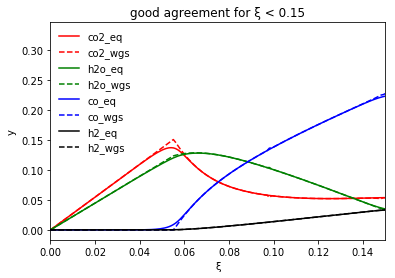

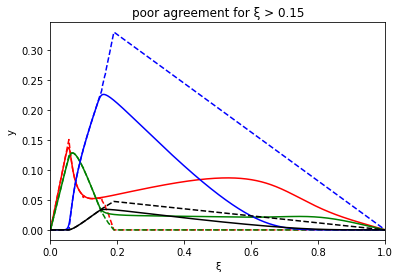

In [10]:
strm = streams({"O2":1, "N2":3.76}, {"CH4":1}, 300, 300, 101325, "gri30.yaml")
#strm = streams({"O2":1}, {"CH4":1}, 300, 300, 101325, "gri30.yaml")

sp = ["CH4", "O2", "N2", "CO2", "H2O", "CO", "H2"]
isp = [strm.gas.species_index(k) for k in sp]
nsp = len(sp)
nξ = 1000
ξ = np.linspace(0,1,nξ)
Tpcc = np.zeros(nξ)
Teq  = np.zeros(nξ)
Twgs = np.zeros(nξ)
ypcc = np.zeros((nξ,nsp))
yeq  = np.zeros((nξ,nsp))
ywgs = np.zeros((nξ,nsp))

for i in range(nξ):
    Tpcc[i]   = strm.get_Tad_for_pCC(ξ[i])
    Teq[i]    = strm.get_Tad_for_EQ(ξ[i])
    Twgs[i]   = strm.get_Tad_for_pWGS(ξ[i])
    yeq[i,:]  = strm.get_pEQ(ξ[i])[isp]
    ypcc[i,:] = strm.get_pCC(ξ[i])[isp]
    ywgs[i,:] = strm.get_pWGS(ξ[i])[isp]
    
plt.plot(ξ, yeq[:, 3], 'r-',  label='co2_eq')
plt.plot(ξ, ywgs[:,3], 'r--', label='co2_wgs')
plt.plot(ξ, yeq[:, 4], 'g-',  label='h2o_eq')
plt.plot(ξ, ywgs[:,4], 'g--', label='h2o_wgs')
plt.plot(ξ, yeq[:, 5], 'b-',  label='co_eq')
plt.plot(ξ, ywgs[:,5], 'b--', label='co_wgs')
plt.plot(ξ, yeq[:, 6], 'k-',  label='h2_eq')
plt.plot(ξ, ywgs[:,6], 'k--', label='h2_wgs')
plt.xlim([0,0.15])
plt.xlabel('ξ')
plt.ylabel('y')
plt.legend(frameon=False);
plt.title('good agreement for ξ < 0.15');

plt.figure()
plt.plot(ξ, yeq[:, 3], 'r-',  label='co2_eq')
plt.plot(ξ, ywgs[:,3], 'r--', label='co2_wgs')
plt.plot(ξ, yeq[:, 4], 'g-',  label='h2o_eq')
plt.plot(ξ, ywgs[:,4], 'g--', label='h2o_wgs')
plt.plot(ξ, yeq[:, 5], 'b-',  label='co_eq')
plt.plot(ξ, ywgs[:,5], 'b--', label='co_wgs')
plt.plot(ξ, yeq[:, 6], 'k-',  label='h2_eq')
plt.plot(ξ, ywgs[:,6], 'k--', label='h2_wgs')
plt.xlim([0,1])
plt.xlabel('ξ')
plt.ylabel('y');
plt.title('poor agreement for ξ > 0.15');

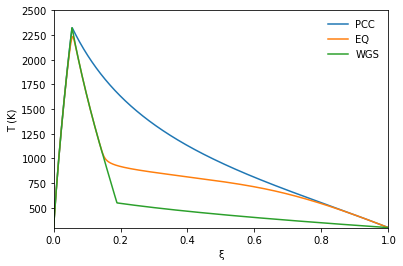

In [11]:
plt.plot(ξ,Tpcc)
plt.plot(ξ,Teq)
plt.plot(ξ,Twgs)
plt.xlabel('ξ')
plt.ylabel('T (K)')
plt.legend(['PCC', 'EQ', 'WGS'], frameon=False)
plt.xlim([0,1])
plt.ylim([298.15,2500]);